# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from sympy import symbols,diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example 1: A Simple Cost Function
## $$ f(x) = x^2 + x +1 $$

In [2]:
def f(x):
    return x**2+x+1
def df(x):
    return 2*x+1

### 1.1 To make data

In [3]:
x_1=np.linspace(start=-3,stop=3,num=500)   #to create multidimensional array


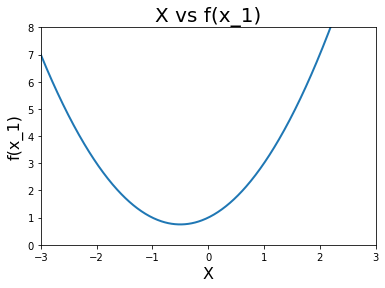

In [4]:
#plot of cost function and its derivate side by side
plt.plot(x_1,f(x_1),linewidth=2)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.title('X vs f(x_1)',fontsize=20)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x_1)',fontsize=16)
plt.show()

### 1.2 To plot the graph


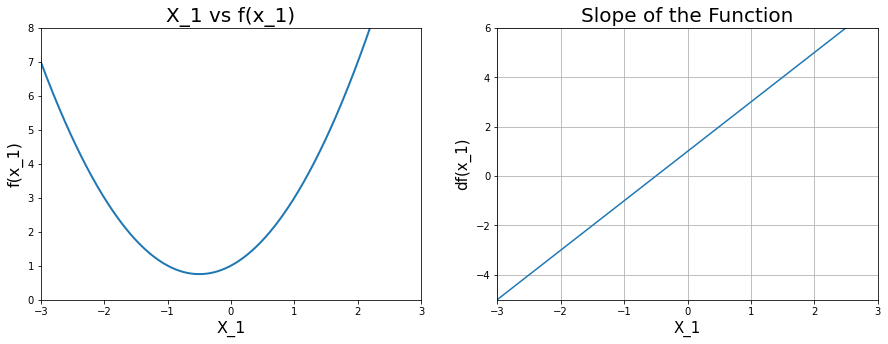

In [5]:
#plot of cost function and its derivate side by side

#Plot of cost function:chart1
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(x_1,f(x_1),linewidth=2)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.title('X_1 vs f(x_1)',fontsize=20)
plt.xlabel('X_1',fontsize=16)
plt.ylabel('f(x_1)',fontsize=16)

#Plot of its Derivate:Chart2
plt.subplot(1,2,2)
plt.plot(x_1,df(x_1))
plt.title('Slope of the Function',fontsize=20)
plt.xlabel('X_1',fontsize=15)
plt.ylabel('df(x_1)',fontsize=15)
plt.xlim(-3,3)
plt.ylim(-5,6)
plt.grid()
plt.show()

###  1.3 Gradient Descent using Loops

In [6]:
#for loop
for n in range(5):
    print('Hello word',n)
print('the end')    

Hello word 0
Hello word 1
Hello word 2
Hello word 3
Hello word 4
the end


In [7]:
#while loop
counter=0
while counter<5:
    print('I\'m counting ',counter)
    counter=counter+1
print('Are you ready?You want me to come')    

I'm counting  0
I'm counting  1
I'm counting  2
I'm counting  3
I'm counting  4
Are you ready?You want me to come


In [8]:
#Gradient descent
new_x=3
previous_x=0
step_multiplier=0.1
precision=0.00001

x_list=[new_x]                  #to create elements to list so that we can plot graph
slope_list=[df(new_x)]

for n in range(500):
    previous_x=new_x                                  #Prediction
    gradient=df(previous_x)                           #calculating the error(slope)
    new_x=previous_x-step_multiplier*gradient         #learning from mistake
    
    step_size=abs(new_x - previous_x)
    
    x_list.append(new_x)                              #to add elements to lists
    slope_list.append(df(new_x))
    
    if step_size< precision:
        print('Loop ran this time:' ,n)
        break
        
print('Local minimum occurs at:',new_x)                              #lowest value
print('slope or df(x) value at this point is:',df(new_x))            #slope
print('f(x) value or cost at this point is :' ,f(new_x))             #cost function

Loop ran this time: 50
Local minimum occurs at: -0.49996003706460423
slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is : 0.7500000015970362


### 1.4 To plot scatter(dots) on graph 

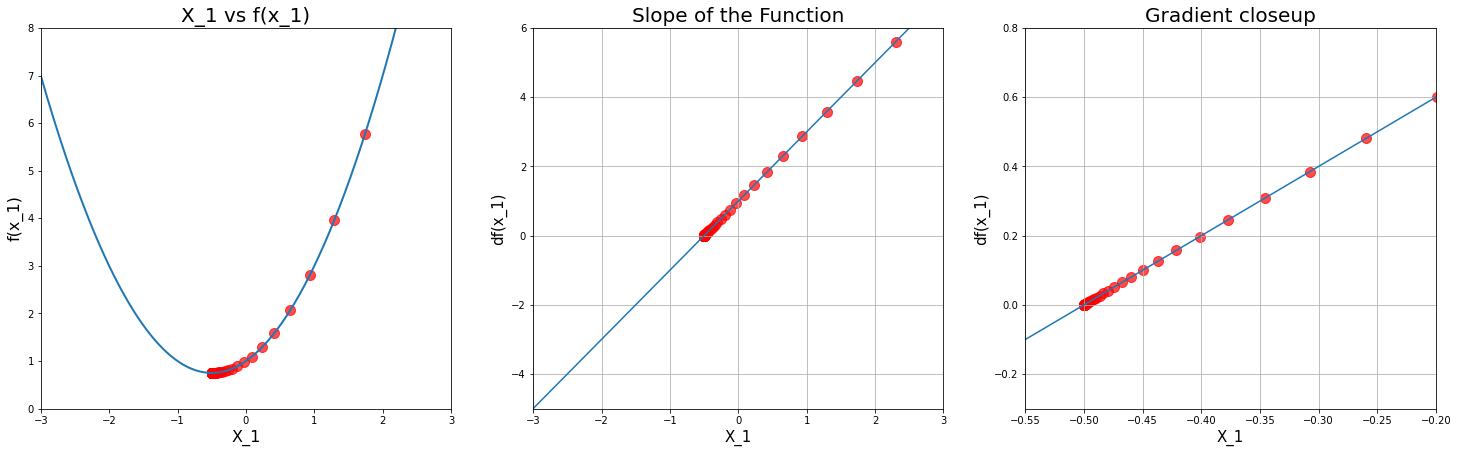

In [9]:
#Plot of cost function:Chart1

plt.figure(figsize=(25,7))
values=np.array(x_list)
plt.subplot(1,3,1)
plt.plot(x_1,f(x_1),linewidth=2)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.title('X_1 vs f(x_1)',fontsize=20)
plt.xlabel('X_1',fontsize=16)
plt.ylabel('f(x_1)',fontsize=16)

plt.scatter(x_list,f(values),color='red',s=100,alpha=0.7)

#Plot of its Derivate:Chart2

plt.subplot(1,3,2)
plt.plot(x_1,df(x_1))
plt.title('Slope of the Function',fontsize=20)
plt.xlabel('X_1',fontsize=15)
plt.ylabel('df(x_1)',fontsize=15)
plt.xlim(-3,3)
plt.ylim(-5,6)
plt.grid()

plt.scatter(x_list,slope_list,color='red',s=100,alpha=0.7)

#Plot of Gradient in close up

plt.subplot(1,3,3)
plt.plot(x_1,df(x_1))
plt.title('Gradient closeup',fontsize=20)
plt.xlabel('X_1',fontsize=15)
plt.ylabel('df(x_1)',fontsize=15)
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)
plt.grid()

plt.scatter(x_list,slope_list,color='red',s=100,alpha=0.7)
plt.show()

# Example 2: Multiple minima vs Intial Guess & Advanced functions
## $$g(x)=x^4 -4x^2+5$$

In [10]:
#defining function and its derivate
def g(x):
    return x**4- 4*x**2+ 5
def dg(x):
    return 4*x**3- 8*x

### 2.1 To make data

In [11]:
#make data
x_2=np.linspace(-2,2,1000)

### 2.2 To plot graph

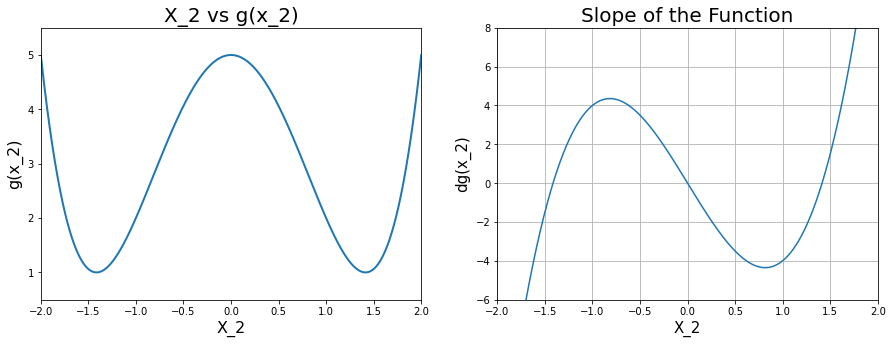

In [12]:
#plot of cost function and its derivate side by side

#Plot of cost function:chart1
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(x_2,g(x_2),linewidth=2)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title('X_2 vs g(x_2)',fontsize=20)
plt.xlabel('X_2',fontsize=16)
plt.ylabel('g(x_2)',fontsize=16)

#Plot of its Derivate:Chart2
plt.subplot(1,2,2)
plt.plot(x_2,dg(x_2))
plt.title('Slope of the Function',fontsize=20)
plt.xlabel('X_2',fontsize=15)
plt.ylabel('dg(x_2)',fontsize=15)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.grid()
plt.show()

### 2.3 Gradient  Descent  as  a  Python  Function 

In [13]:
n=100
def gradient_descent(derivate_func,intial_guess,multiplier=0.02,precision=0.001,max_iter=n):
    
    new_x=intial_guess
    
    x_list=[new_x]                                   #creating list 
    slope_list=[derivate_func(new_x)]
    
    for n in range(max_iter):
        previous_x=new_x
        gradient=derivate_func(previous_x)
        new_x=previous_x- multiplier*gradient
        
        stepsize=abs(new_x-previous_x)
        
        x_list.append(new_x)                         #adding elements to list
        slope_list.append(derivate_func(new_x))
        
        if stepsize< precision:
            break
            
    return new_x,x_list,slope_list               #returning lowest value,array list,slope list
    

In [14]:
#calling function
#new_x,x_list,slope_list
local_min,list_x,deriv_list=gradient_descent(derivate_func=dg,intial_guess=0.1)
print('local minimum occurs at:',local_min)
print('Number of steps:',len(list_x))


local minimum occurs at: 1.4120887490901561
Number of steps: 34


### 2.4 To plot scatters on line

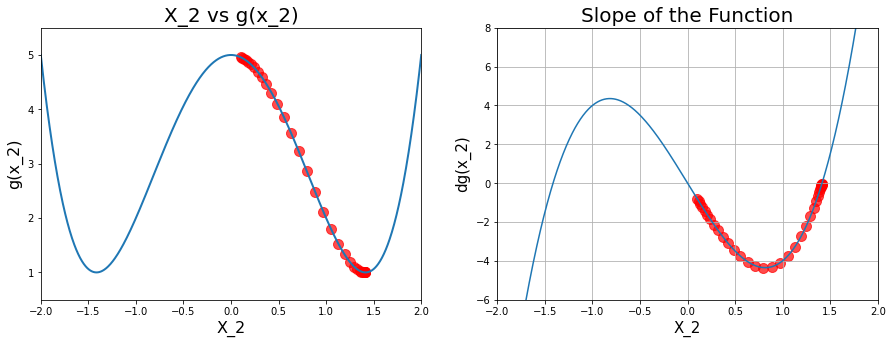

In [15]:
#plot of cost function and its derivate side by side

local_min,list_x,deriv_list = gradient_descent(derivate_func=dg,intial_guess=0.1)
#new_x,x_list,slope_list


#Plot of cost function:chart1

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(x_2,g(x_2),linewidth=2)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.scatter(list_x,g(np.array(list_x)),color='red',s=100,alpha=0.7)
plt.title('X_2 vs g(x_2)',fontsize=20)
plt.xlabel('X_2',fontsize=16)
plt.ylabel('g(x_2)',fontsize=16)

#Plot of its Derivate:Chart2

plt.subplot(1,2,2)
plt.plot(x_2,dg(x_2))
plt.title('Slope of the Function',fontsize=20)
plt.xlabel('X_2',fontsize=15)
plt.ylabel('dg(x_2)',fontsize=15)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.scatter(list_x,deriv_list,s=100,color='red',alpha=0.7)
plt.grid()
plt.show()

# Example 3 :
# Effect of Learning Rate 

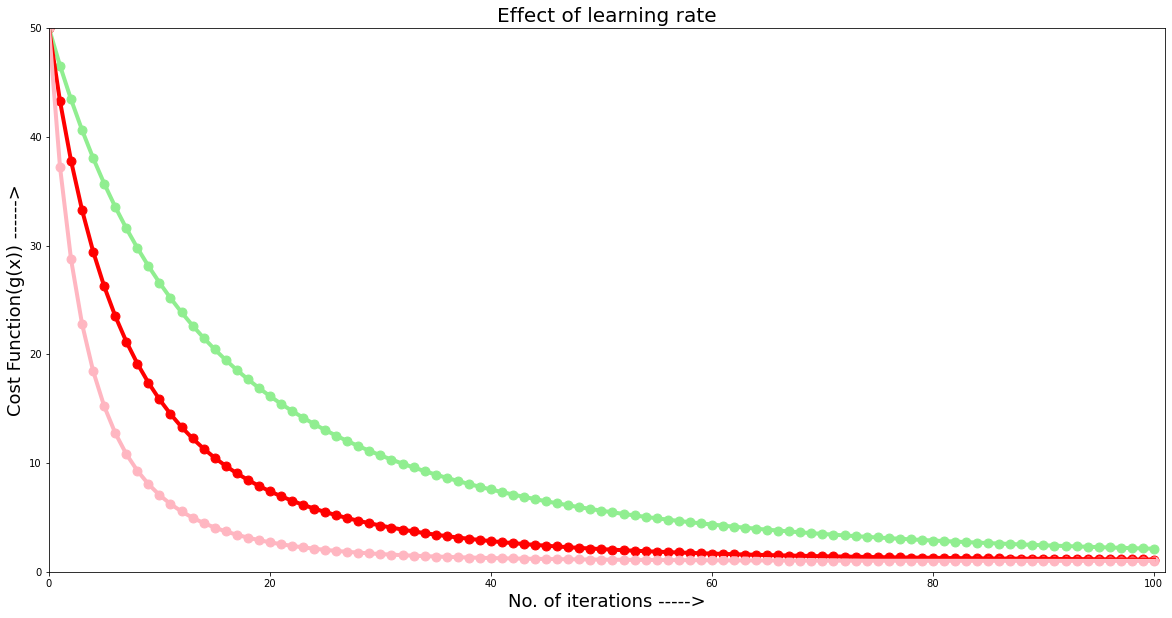

In [16]:
#To plot Effect of different learning rate on a same function

n=100
# 1) To plot low gamma 
low_gamma=gradient_descent(derivate_func=dg,intial_guess=3,multiplier=0.0005,precision=0.0001,max_iter=n)

# 2) To plot mid gamma
mid_gamma=gradient_descent(derivate_func=dg,intial_guess=3,multiplier=0.001,precision=0.0001,max_iter=n)

# 3) To plot high gamma
high_gamma=gradient_descent(derivate_func=dg,intial_guess=3,multiplier=0.002,precision=0.0001,max_iter=n)

plt.figure(figsize=(20,10))

plt.title('Effect of learning rate',fontsize=20)
plt.xlabel('No. of iterations ----->',fontsize=18)
plt.ylabel('Cost Function(g(x)) ------>',fontsize=18)
plt.xlim(0,n+1)
plt.ylim(0,50)

#Values for our charts

# 1)X axis:Create a list from 0 to n+1
iteration_list=list(range(0,n+1))

# 2)Y axis:convert a list to an numpy array
low_values=np.array(low_gamma[1])
mid_values=np.array(mid_gamma[1])
high_values=np.array(high_gamma[1])

#To plot charts

#to plot chart no.1
plt.plot(iteration_list,g(low_values),linewidth=4,color='lightgreen')
plt.scatter(iteration_list,g(low_values),s=80,color='lightgreen')

#to plot chart no.2
plt.plot(iteration_list,g(mid_values),linewidth=4,color='red')
plt.scatter(iteration_list,g(mid_values),s=80,color='red')

#to plot chart no.3
plt.plot(iteration_list,g(high_values),linewidth=4,color='lightpink')
plt.scatter(iteration_list,g(high_values),s=80,color='lightpink')

plt.show()

# Example 4 : Data Viz and 3D Charts
## $$f(x,y)= \frac {1}{3^{-x^2 - y^2}+1}$$
### $$(or)$$
## $$f(x,y)=\frac {1}{r + 1}$$ where $r$ is ${3^{-x^2-y^2}}$



In [17]:
def f(x,y):
    r=3**(-x**2-y**2)
    return 1/(r + 1)

### 4.1 To make Data for x and y

In [18]:
#to make data for x and y

x_4=np.linspace(start=-2,stop=2,num=200)
y_4=np.linspace(start=-2,stop=2,num=200)
print('Shape of X array:',x_4.shape)       #to know dimension

x_4,y_4=np.meshgrid(x_4,y_4)                #to convert 1D to 2D
print('Shape after mesh grid:',x_4.shape)

Shape of X array: (200,)
Shape after mesh grid: (200, 200)


### 4.2 To plot 3D surface

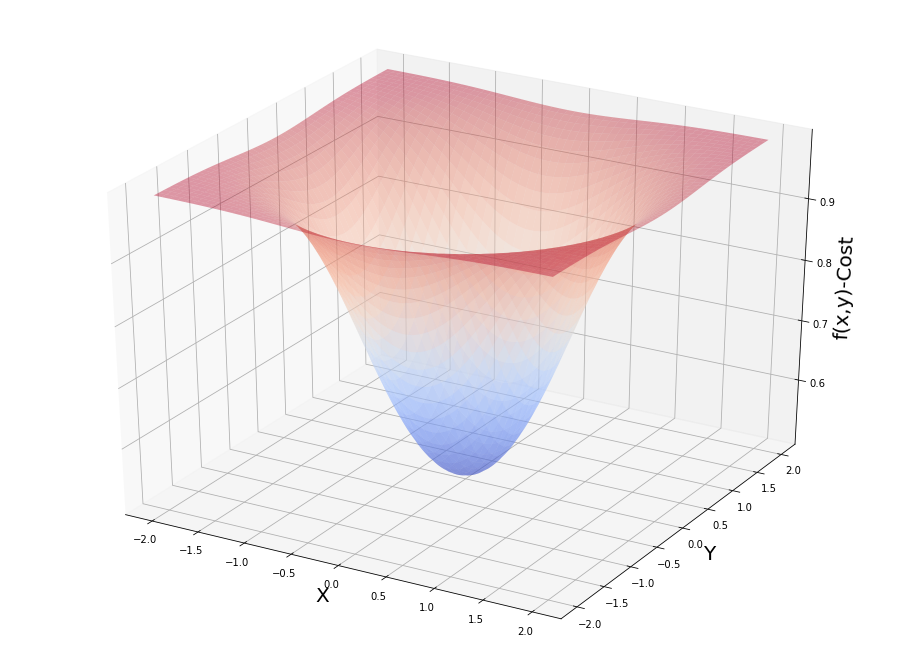

In [19]:
#Generating 3D plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')            #gca=get current axis

#Labelling
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y)-Cost',fontsize=20)

#To plot 3D Charts
ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.coolwarm,alpha=0.4)

plt.show()


### 4.3 Partial Derivate and Symbolic Computation (Slope)

In [20]:
a,b = symbols('x,y')

In [21]:
print('The cost function of f(x,y):', f(a,b))

The cost function of f(x,y): 1/(3**(-x**2 - y**2) + 1)


In [22]:
f(a,b).evalf(subs={a:1.8,b:1.0})

0.990604794032582

In [23]:
print('The value of f(x,y) at x=1.8,y=1.0 is',f(a,b).evalf(subs={a:1.8,b:1.0}))

The value of f(x,y) at x=1.8,y=1.0 is 0.990604794032582


In [24]:
diff(f(a,b),a)

2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

In [25]:
print('The partial derivate of f(x,y) is:',diff(f(a,b),a))

The partial derivate of f(x,y) is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2


In [26]:
diff(f(a,b),a).evalf(subs={a:1.8,b:1.0})

0.0368089716197505

In [27]:
print('The P.D of f(x,y) at x=1.8,y=1.0 is',diff(f(a,b),a).evalf(subs={a:1.8,b:1.0}))

The P.D of f(x,y) at x=1.8,y=1.0 is 0.0368089716197505


## 4.4 Gradient Descent
### 4.4.1 Gradient Descent with Sympy

In [28]:
#setup

multiplier=0.1
max_iter=500
params=np.array([1.8,1.0])    #INTIAL GUESS(if we have two data,change it using numpy)
values_array= params.reshape(1,2)

for n in range(max_iter):
    gradient_x= diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})      #gradient along x     
    gradient_y= diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})      #gradient along y

    gradients=np.array([gradient_x,gradient_y])                         #converting to single value
    
    params=params-multiplier*gradients                       #new_x=previous_x - multiplier*gradient
    values_array=np.append(values_array,params.reshape(1,2),axis=0)
    
print('Value of gradients x and y', gradients)
print('Minimum occurs at x is',params[0])
print('Minimum occurs at y is',params[1])
print('The cost is:',f(params[0],params[1]))

Value of gradients x and y [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x is 3.45838599885832e-11
Minimum occurs at y is 1.92132555492129e-11
The cost is: 0.500000000000000


###          4.4.2 Gradient Descent without using Sympy 

### $$ \frac{\partial f}{\partial x} =\frac {2x\ln(3) \cdot 3^{-x^2-y^2}}{( 3^{-x^2-y^2}+1)^2 } $$ 

### $$ \frac{\partial f}{\partial y} = \frac {2y\ln(3) \cdot 3^{-x^2-y^2}}{{(3^{-x^2-y^2}+1})^2 } $$

In [29]:
#defining partial derivate function
def fpx(x,y):
    r=3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r+1)**2

def fpy(x,y):
    r=3**(-x**2-y**2)
    return 2*y*log(3)*r /(r+1)**2


In [30]:
#Setup
multiplier=0.1
max_iter=500
params=np.array([1.8,1.0])
values_array = params.reshape(1,2)

for n in range(max_iter):
    
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])

    params = params-multiplier*gradients
    values_array = np.append(values_array,params.reshape(1,2),axis=0)

#Results
print('The value of Gradients is',gradients)
print('Minimum value of x is',params[0])
print('Minimum value of y is',params[1])
print('The cost is',f(params[0],params[1]))

The value of Gradients is [2.01013038e-11 1.11673910e-11]
Minimum value of x is 3.458385998858304e-11
Minimum value of y is 1.9213255549212797e-11
The cost is 0.5


### 4.5 To plot scatter on 3D graph

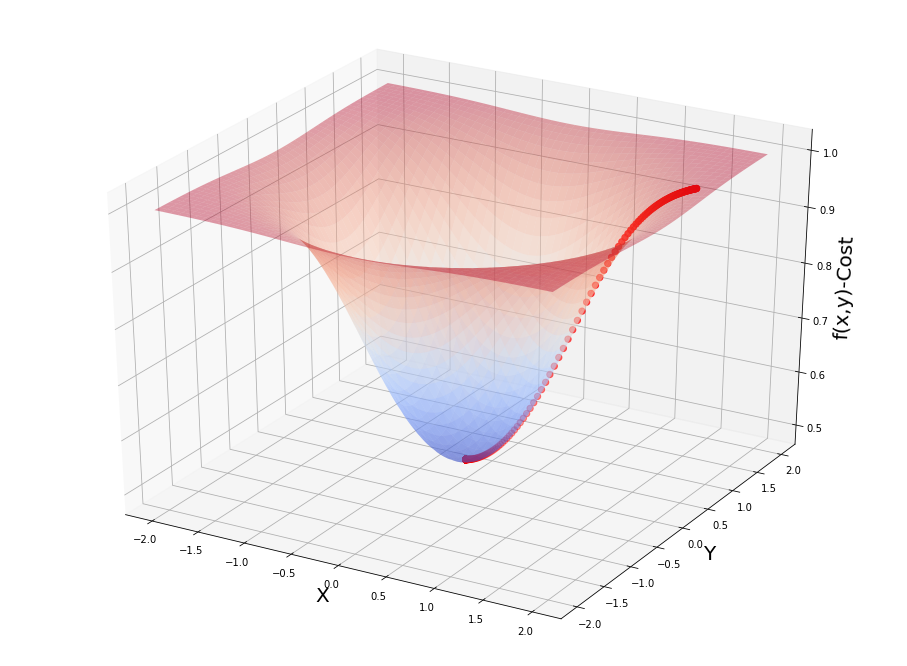

In [31]:
#To plot scatter points
#Generating 3D plot
fig= plt.figure(figsize=[16,12])
ax= fig.gca(projection='3d')            #gca=get current axis

#Labelling
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y)-Cost',fontsize=20)

#To plot 3D Charts
ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.coolwarm,alpha=0.4)
ax.scatter(values_array[:,0] , values_array[:,1],f(values_array[:,0],values_array[:,1]),
           s=40,color='red')

plt.show()